# Set Up

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nibabel.freesurfer.io as fsio
from nilearn import datasets, plotting
import numpy as np
from matplotlib import cm
import re
import nibabel as nib

# Set Arial as the default font
plt.rcParams['font.family'] = 'Arial'

# MIND Matrix

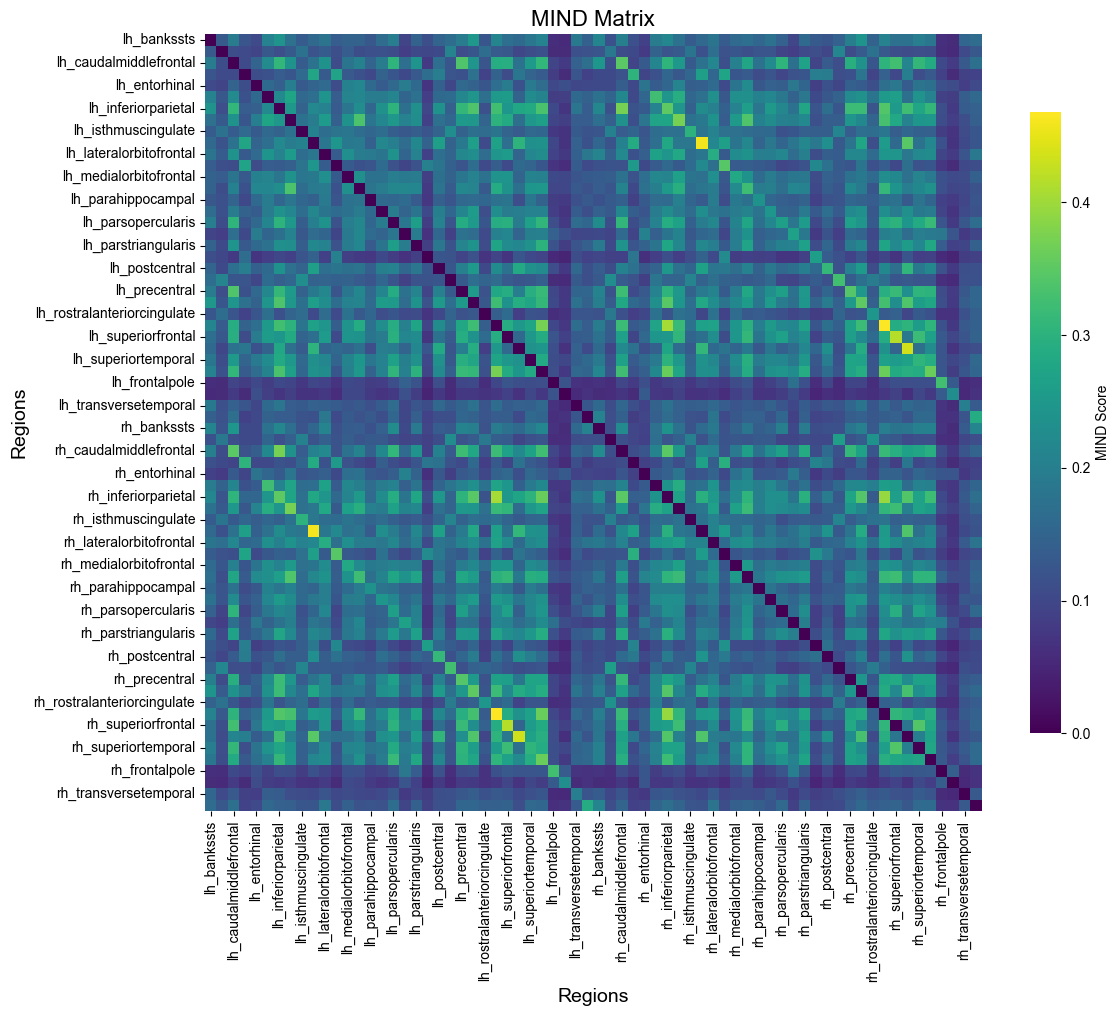

In [23]:
df = pd.read_csv('/Users/baileyng/MIND_data/MIND_results/1000177_20263_2_0_aparc_MIND_matrix.csv', index_col=0)
plt.figure(figsize=(12, 10))
sns.heatmap(df,
            cmap='viridis',
            square=True,
            vmin=0,
            cbar_kws={'shrink': 0.8, 'label': 'MIND Score'})

plt.title('MIND Matrix', fontsize=16)
plt.xlabel('Regions', fontsize=14)
plt.ylabel('Regions', fontsize=14)
plt.tight_layout()
plt.show()




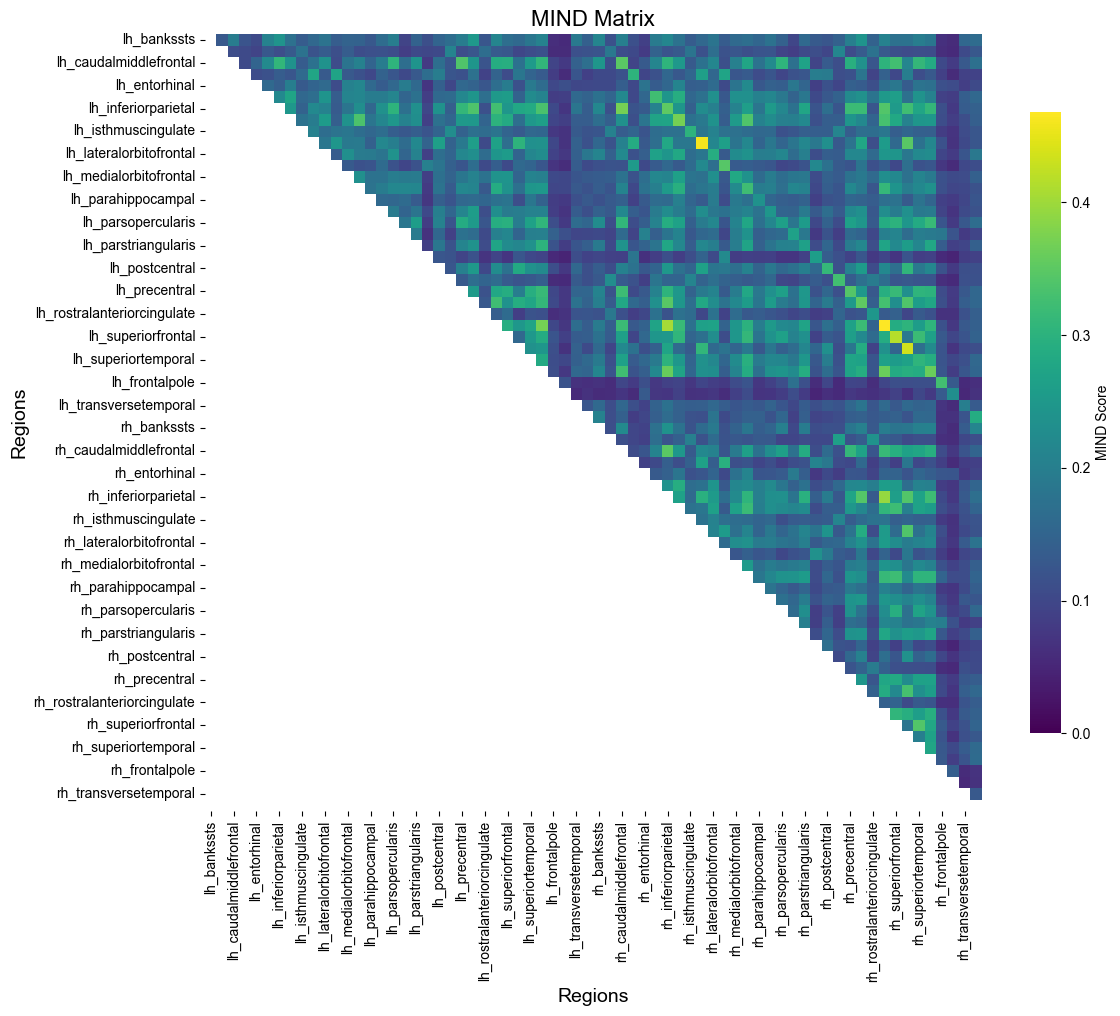

In [24]:
df = pd.read_csv('/Users/baileyng/MIND_data/MIND_results/1000177_20263_2_0_aparc_MIND_matrix.csv', index_col=0)

mask = np.tril(np.ones_like(df, dtype=bool))

plt.figure(figsize=(12, 10))
sns.heatmap(df,
            mask=mask,
            cmap='viridis',
            square=True,
            vmin=0,
            cbar_kws={'shrink': 0.8, 'label': 'MIND Score'})

plt.title('MIND Matrix', fontsize=16)
plt.xlabel('Regions', fontsize=14)
plt.ylabel('Regions', fontsize=14)
plt.tight_layout()
plt.show()

# MIND Avg Matrix

In [25]:
avg_df = pd.read_csv('/Users/baileyng/MIND_data/MIND_results/1000177_20263_2_0_aparc_MIND_avg_matrix.csv', index_col=0)

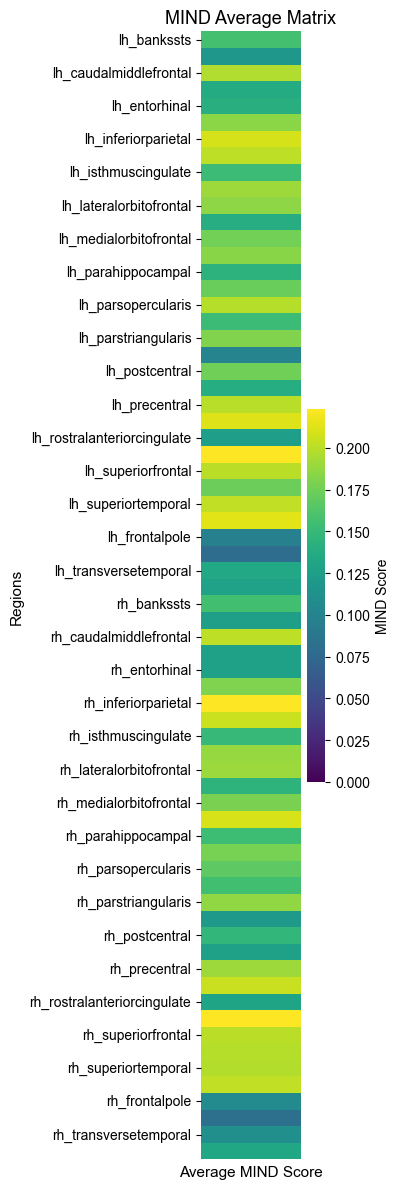

In [26]:
plt.figure(figsize=(4, 12))
sns.heatmap(avg_df,
            cmap='viridis',
            vmin=0,
            xticklabels=False,
            cbar_kws={'shrink': 0.8, 'label': 'MIND Score'})

plt.title('MIND Average Matrix', fontsize=13)
plt.xlabel('Average MIND Score', fontsize=11)
plt.ylabel('Regions', fontsize=11)
plt.tight_layout()
plt.show()

# FC Matrix

In [27]:
fc_df = pd.read_csv('/Users/baileyng/MIND_data/MIND_results/1000177_25752_2_0_FC_matrix.csv', index_col=0)

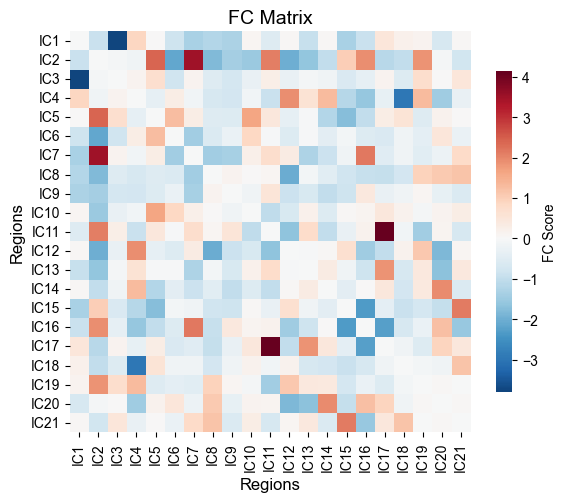

In [28]:
fc_df = pd.read_csv('/Users/baileyng/MIND_data/MIND_results/1000177_25752_2_0_FC_matrix.csv', index_col=0)

plt.figure(figsize=(6, 5))
sns.heatmap(fc_df,
            cmap='RdBu_r',
            center=0,
            square=True,
            cbar_kws={'shrink': 0.8, 'label': 'FC Score'})

plt.title('FC Matrix', fontsize=14)
plt.xlabel('Regions', fontsize=12)
plt.ylabel('Regions', fontsize=12)
plt.tight_layout()
plt.show()

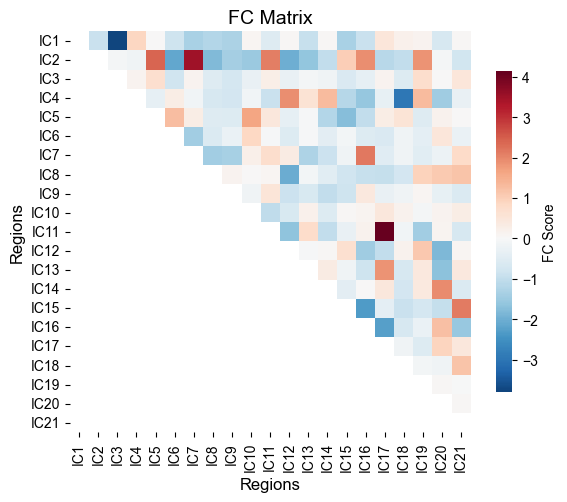

In [29]:
fc_df = pd.read_csv('/Users/baileyng/MIND_data/MIND_results/1000177_25752_2_0_FC_matrix.csv', index_col=0)

mask = np.tril(np.ones_like(fc_df, dtype=bool))

plt.figure(figsize=(6, 5))
sns.heatmap(fc_df,
            mask=mask,
            cmap='RdBu_r',
            center=0,
            square=True,
            cbar_kws={'shrink': 0.8, 'label': 'FC Score'})

plt.title('FC Matrix', fontsize=14)
plt.xlabel('Regions', fontsize=12)
plt.ylabel('Regions', fontsize=12)
plt.tight_layout()
plt.show()

In [30]:
fc_df = pd.read_csv('/Users/baileyng/MIND_data/MIND_results/1003595_25752_2_0_FC_matrix.csv', index_col=0)

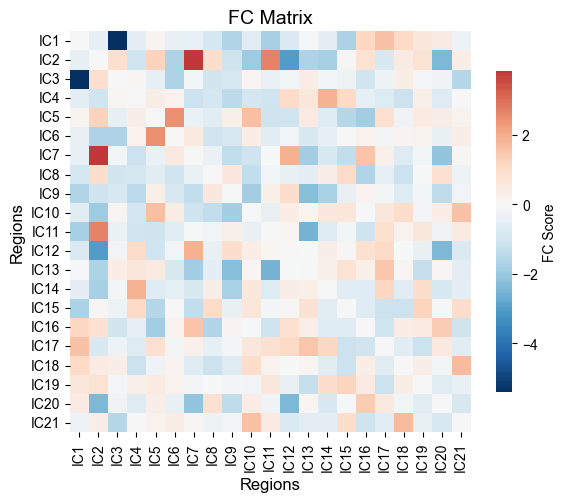

In [31]:
plt.figure(figsize=(6, 5))
sns.heatmap(fc_df,
            cmap='RdBu_r',
            center=0,
            square=True,
            cbar_kws={'shrink': 0.8, 'label': 'FC Score'})

plt.title('FC Matrix', fontsize=14)
plt.xlabel('Regions', fontsize=12)
plt.ylabel('Regions', fontsize=12)
plt.tight_layout()
plt.show()

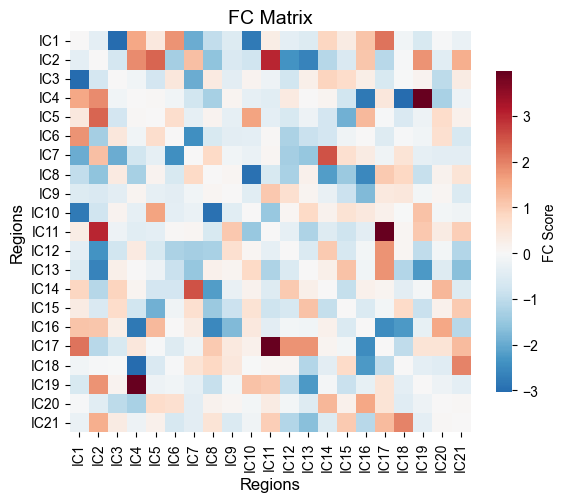

In [32]:
fc_df = pd.read_csv('/Users/baileyng/MIND_data/MIND_results/1016727_25752_2_0_FC_matrix.csv', index_col=0)
plt.figure(figsize=(6, 5))
sns.heatmap(fc_df,
            cmap='RdBu_r',
            center=0,
            square=True,
            cbar_kws={'shrink': 0.8, 'label': 'FC Score'})

plt.title('FC Matrix', fontsize=14)
plt.xlabel('Regions', fontsize=12)
plt.ylabel('Regions', fontsize=12)
plt.tight_layout()
plt.show()

# CT Brain Map

In [33]:
ct_df = pd.read_csv('/Users/baileyng/MIND_data/ukb_cog/ukb_master_allcols_no_outliers.csv')

In [34]:
rename = pd.read_csv('/Users/baileyng/MIND_models/region_names/col_renames.csv')
rename_dict = dict(zip(rename['datafield_code'], rename['datafield_name']))

ct_df = ct_df.rename(columns=rename_dict)

In [35]:
with open('/Users/baileyng/MIND_models/region_names/CT_regions.txt', 'r') as f:
    brain_regions = [line.strip() for line in f.readlines()]

brain_regions = [rename_dict[region] for region in brain_regions]

In [36]:
def varname_to_region(var):
    if var.startswith('lh_'):
        return 'lh', var.replace('lh_', '').replace('_thickness', '')
    elif var.startswith('rh_'):
        return 'rh', var.replace('rh_', '').replace('_thickness', '').replace('.', '')
    return None, None

# 2. Set FreeSurfer fsaverage path
fsaverage_path = '/Applications/freesurfer/subjects/fsaverage'

# 3. Load annotation files
lh_annot = fsio.read_annot(f'{fsaverage_path}/label/lh.aparc.annot')
rh_annot = fsio.read_annot(f'{fsaverage_path}/label/rh.aparc.annot')
lh_labels, lh_cmap, lh_names = lh_annot
rh_labels, rh_cmap, rh_names = rh_annot
lh_names = [name.decode('utf-8') for name in lh_names]
rh_names = [name.decode('utf-8') for name in rh_names]

(62,)


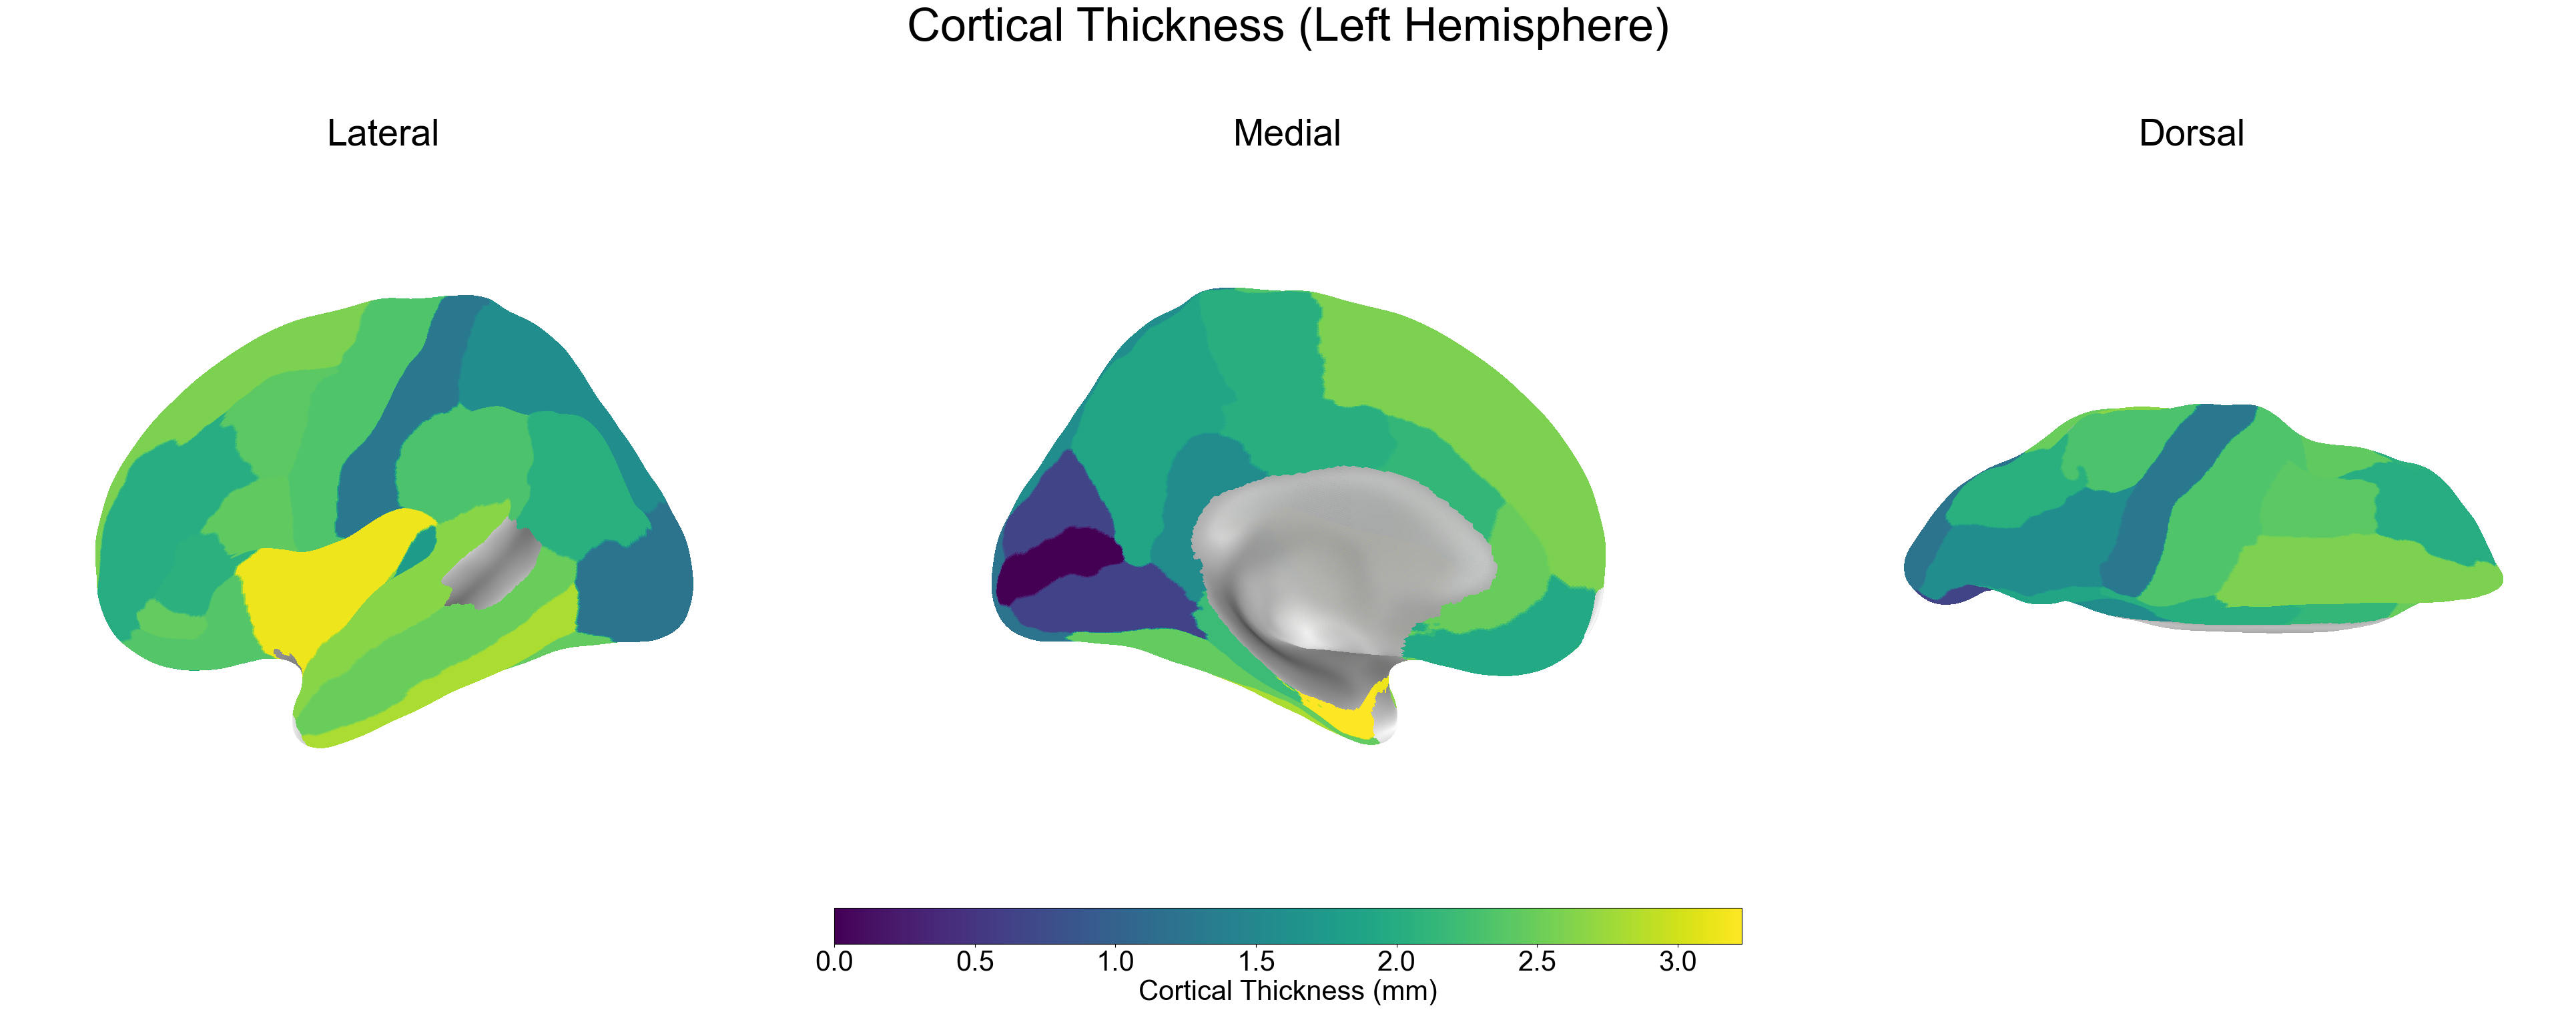

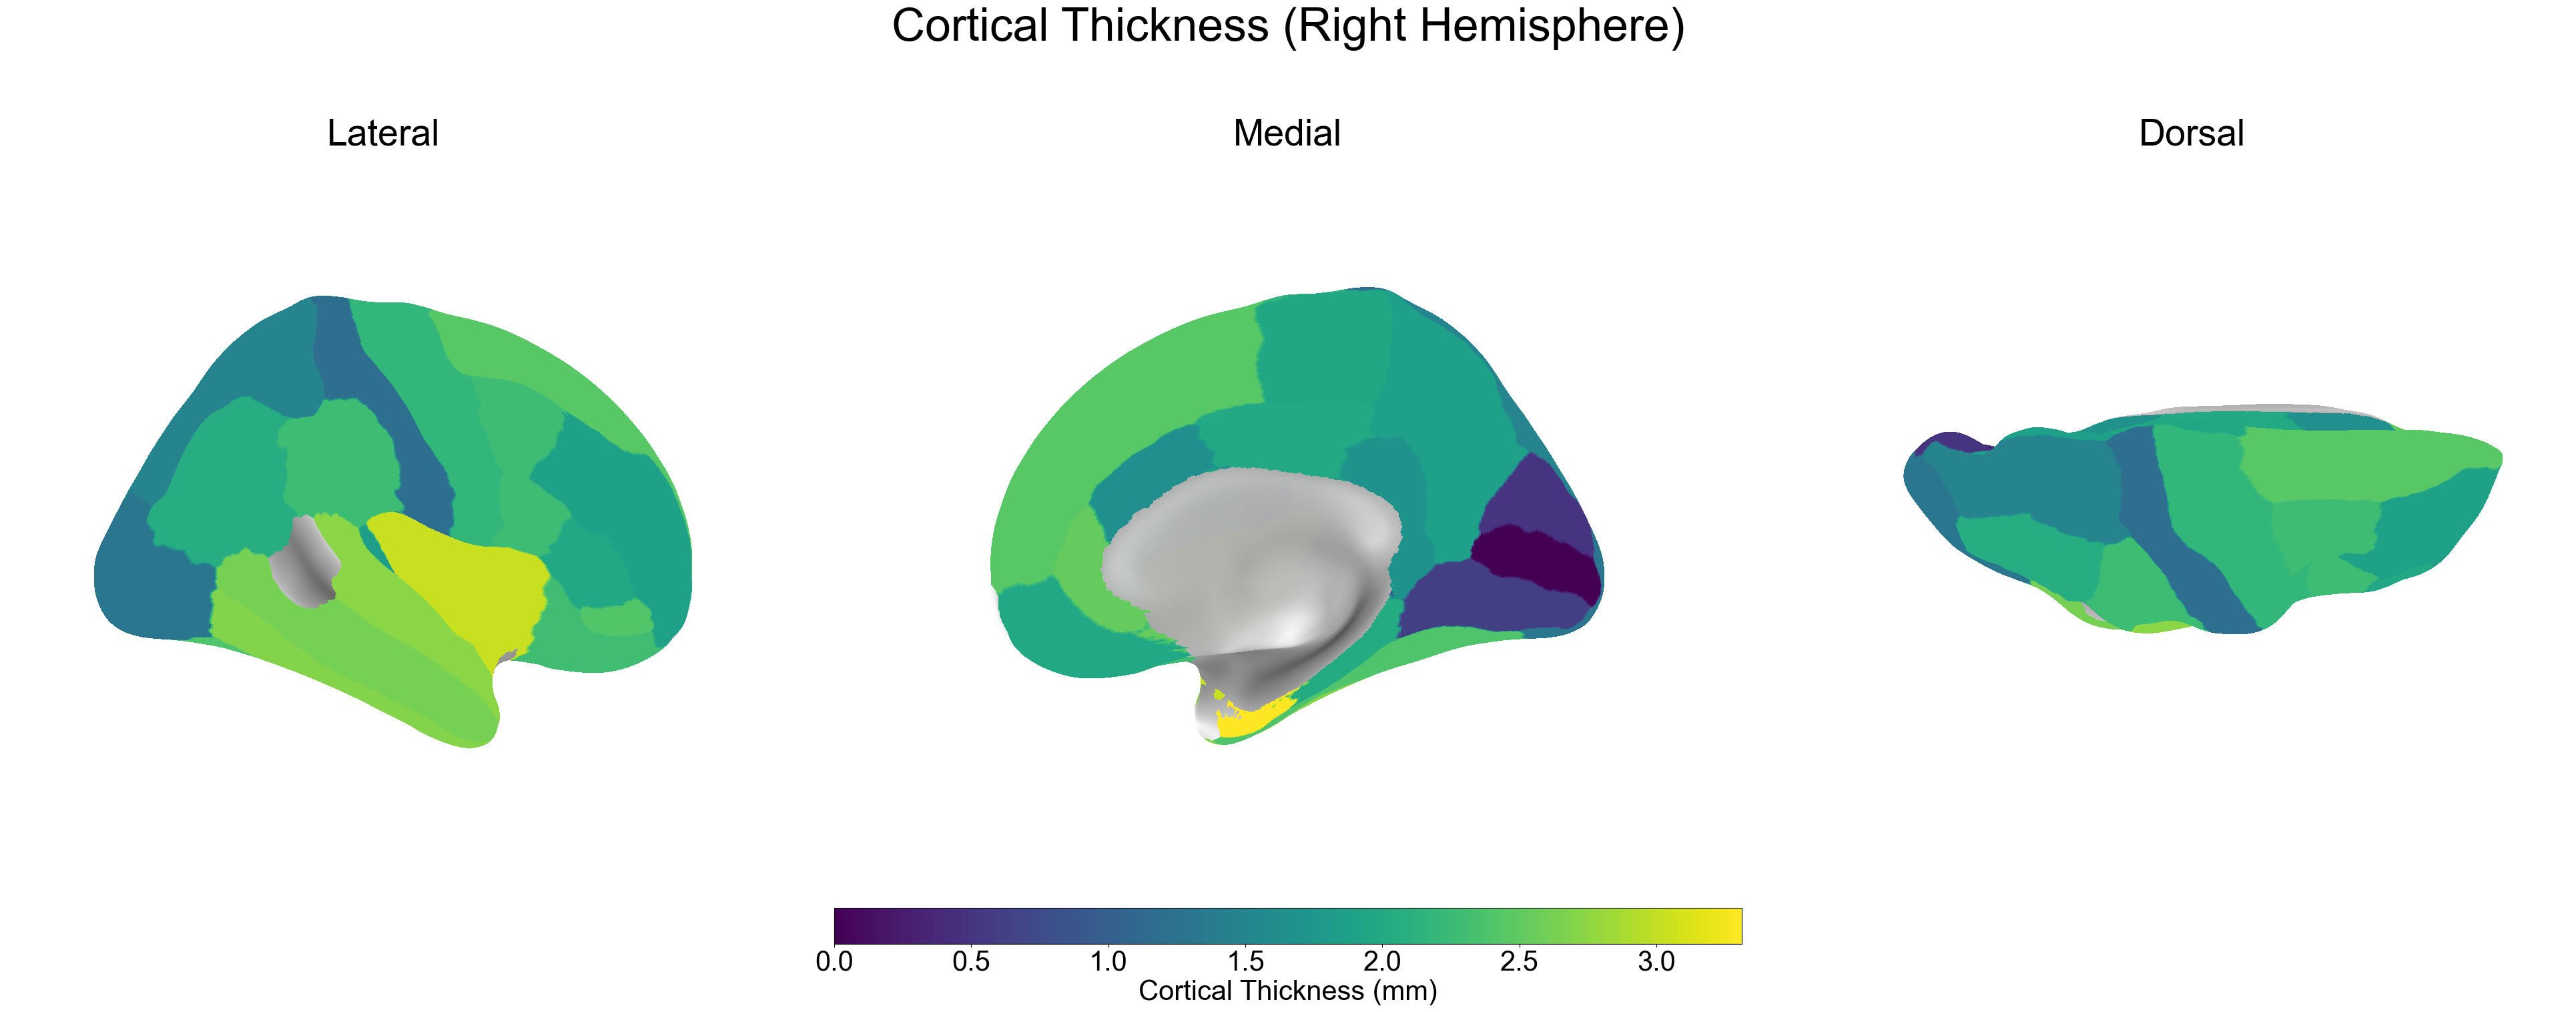

In [37]:
# 1. Variable names and coefficients
vars_to_plot = brain_regions
means = ct_df[vars_to_plot].mean().values.flatten()

print(means.shape)

# 4. Prepare vertex data arrays
lh_vertex_data = np.full_like(lh_labels, np.nan, dtype=float)
rh_vertex_data = np.full_like(rh_labels, np.nan, dtype=float)

for var, coef in zip(vars_to_plot, means):
    hemi, region = varname_to_region(var)
    if hemi == 'lh':
        idxs = [i for i, n in enumerate(lh_names) if region.lower() in n.lower()]
        for idx in idxs:
            lh_vertex_data[lh_labels == idx] = coef
    elif hemi == 'rh':
        idxs = [i for i, n in enumerate(rh_names) if region.lower() in n.lower()]
        for idx in idxs:
            rh_vertex_data[rh_labels == idx] = coef

# 5. Load inflated_pre surfaces
lh_inflated_pre_path = f'{fsaverage_path}/surf/lh.inflated_pre'
rh_inflated_pre_path = f'{fsaverage_path}/surf/rh.inflated_pre'
lh_coords, lh_faces = fsio.read_geometry(lh_inflated_pre_path)
rh_coords, rh_faces = fsio.read_geometry(rh_inflated_pre_path)
lh_mesh = (lh_coords, lh_faces)
rh_mesh = (rh_coords, rh_faces)

# 7. Plotting function
def plot_three_views_custom(surf_mesh, vertex_data, bg_map, hemi, title):
    views = ['lateral', 'medial', 'dorsal']
    fig, axes = plt.subplots(1, 3, subplot_kw={'projection': '3d'}, figsize=(40, 18))
    cmap = 'viridis'
    for i, view in enumerate(views):
        plotting.plot_surf_stat_map(
            surf_mesh, vertex_data, hemi=hemi, bg_map=bg_map,
            cmap=cmap, colorbar=False, symmetric_cbar=False,
            view=view, axes=axes[i], title='', figure=fig, alpha=0.9
        )
        axes[i].set_title(view.capitalize(), fontsize=40)
        axes[i].axis('off')
    
    # Colorbar positioned closer to brains - moved up from 0.09 to 0.25
    cbar_ax = fig.add_axes([0.33, 0.18, 0.34, 0.03])
    norm = plt.Normalize(vmin=0, vmax=np.nanmax(vertex_data))
    cb = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax, orientation='horizontal', shrink=1.8)
    cb.set_label('Cortical Thickness (mm)', fontsize=30)
    cb.ax.tick_params(labelsize=30)
    
    plt.suptitle(title, fontsize=50, y=0.96)
    plt.subplots_adjust(left=0.02, right=0.98, top=0.9, bottom=0.15)
    plt.show()

# 6. Load fsaverage sulcal maps for background
fsavg = datasets.fetch_surf_fsaverage('fsaverage')
sulc_left = fsavg.sulc_left
sulc_right = fsavg.sulc_right

# 8. Plot with inflated_pre
plot_three_views_custom(lh_mesh, lh_vertex_data, sulc_left, 'left', 'Cortical Thickness (Left Hemisphere)')
plot_three_views_custom(rh_mesh, rh_vertex_data, sulc_right, 'right', 'Cortical Thickness (Right Hemisphere)')

# MIND Avg Brain Map

In [38]:
avg_df = pd.read_csv('/Users/baileyng/MIND_data/MIND_results/row_averages.csv', index_col=0)

In [39]:
with open('/Users/baileyng/MIND_models/region_names/MIND_avg_regions.txt', 'r') as f:
    brain_regions = [line.strip() for line in f.readlines()]

(68,)


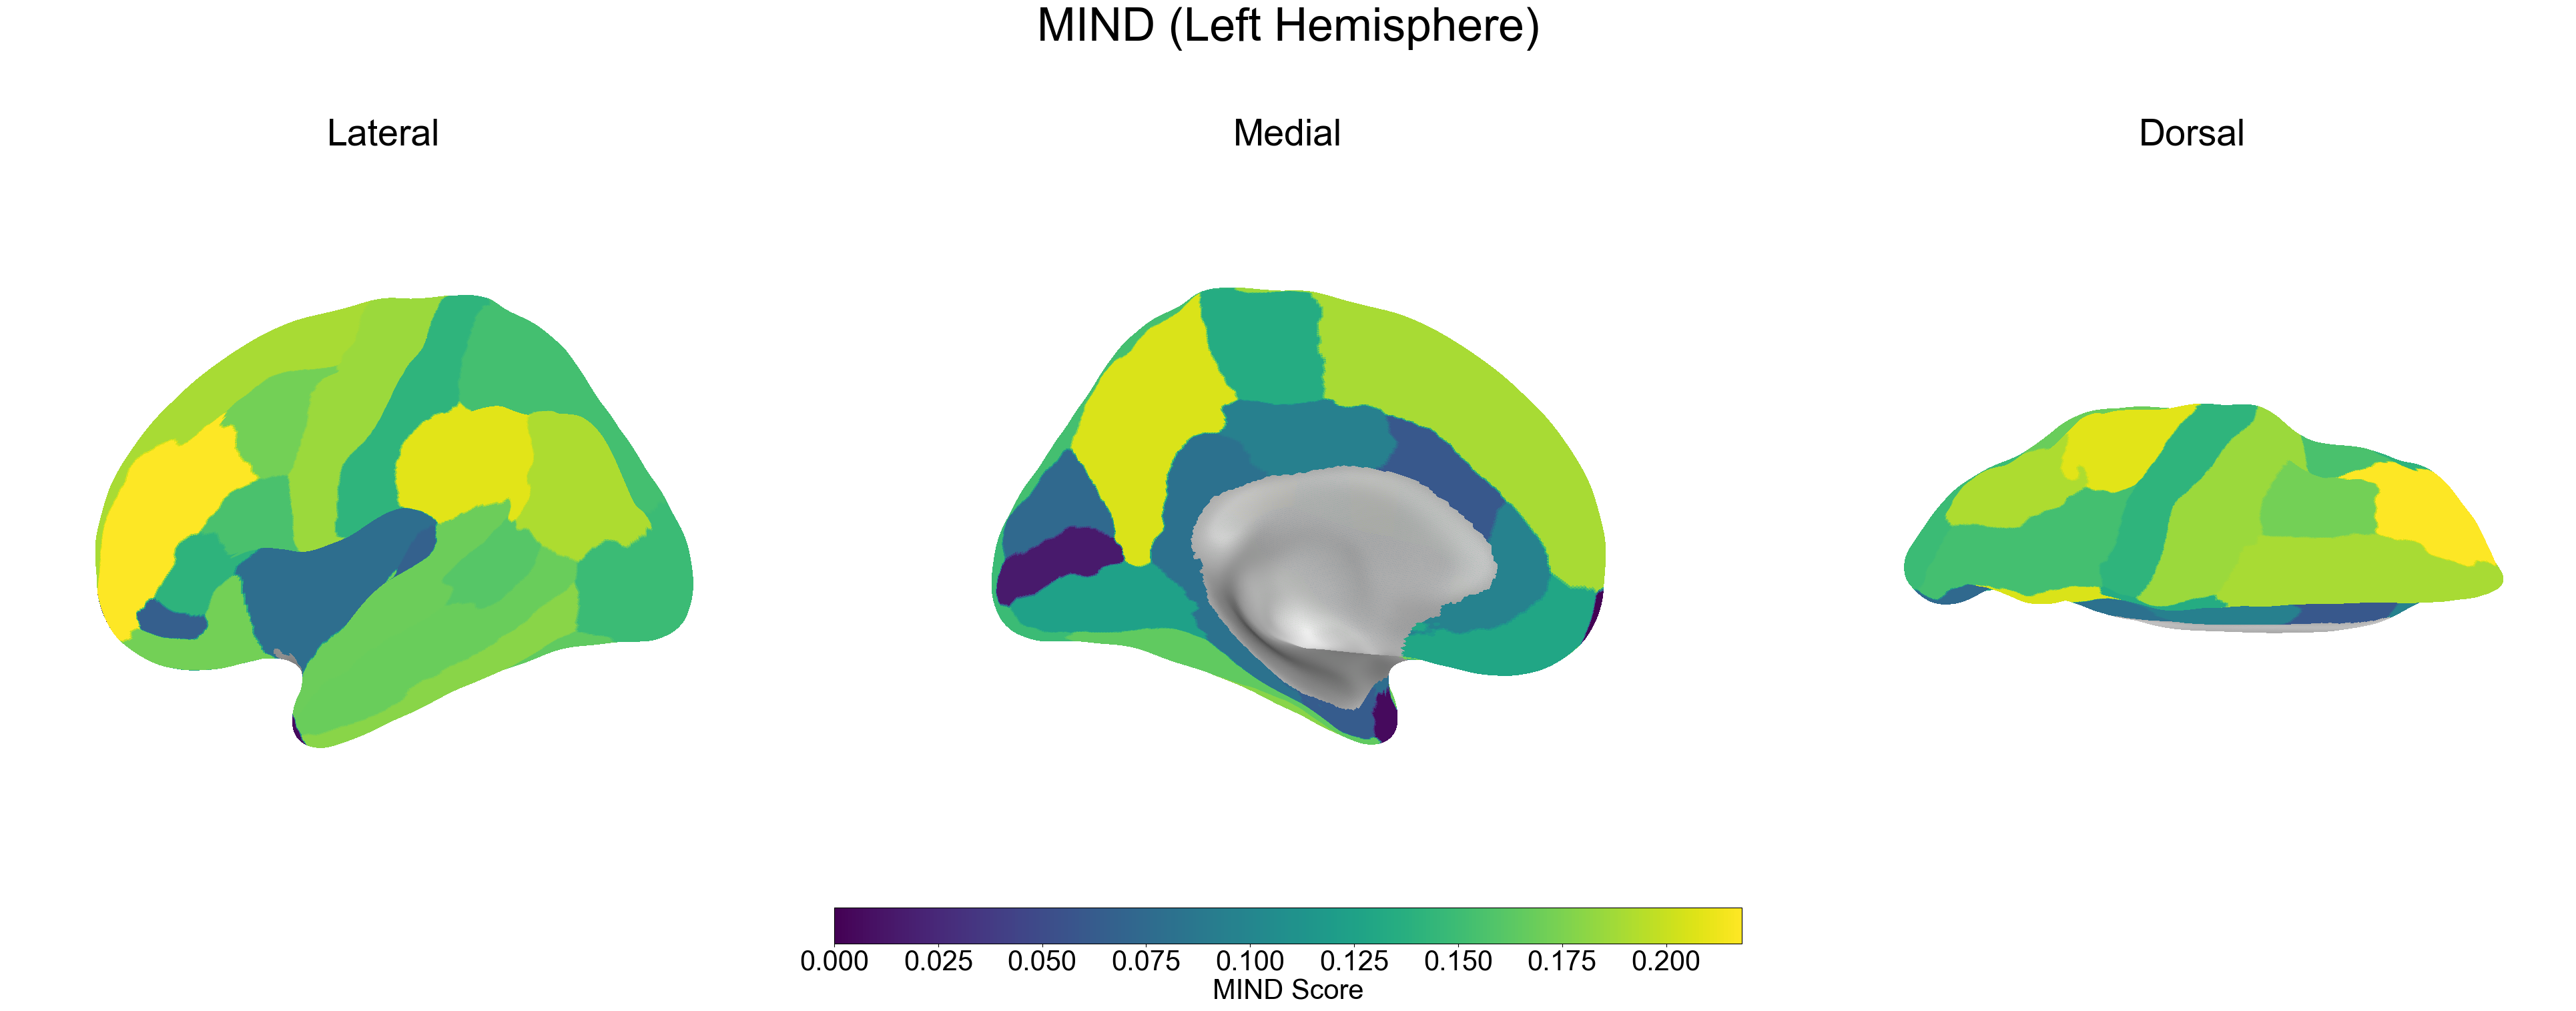

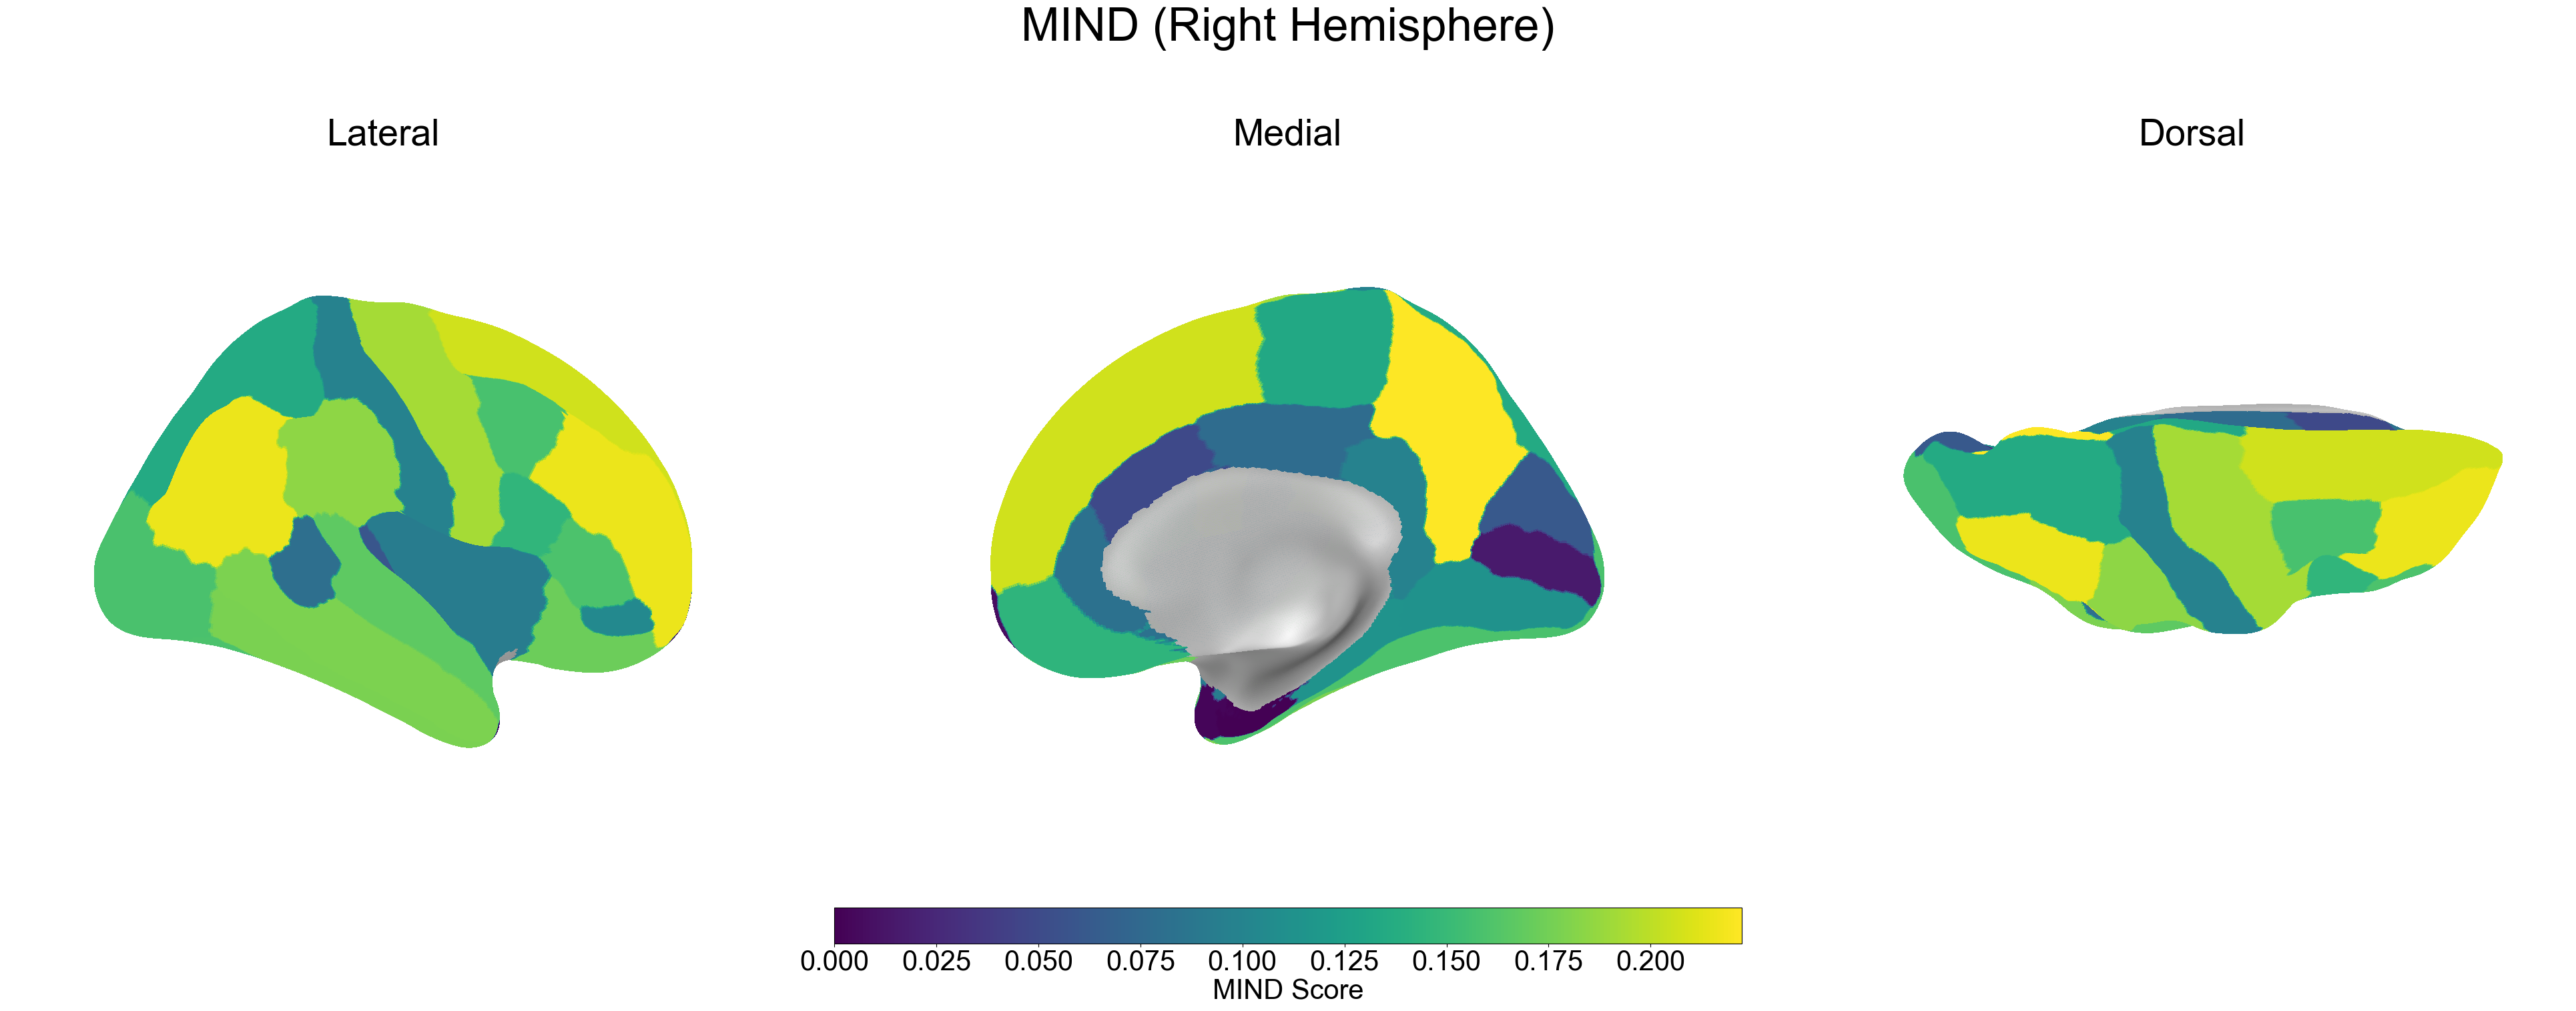

In [41]:
# 1. Variable names and coefficients
vars_to_plot = brain_regions
means = avg_df.loc[vars_to_plot, 'average'].values

print(means.shape)

# 4. Prepare vertex data arrays
lh_vertex_data = np.full_like(lh_labels, np.nan, dtype=float)
rh_vertex_data = np.full_like(rh_labels, np.nan, dtype=float)

for var, coef in zip(vars_to_plot, means):
    hemi, region = varname_to_region(var)
    if hemi == 'lh':
        idxs = [i for i, n in enumerate(lh_names) if region.lower() in n.lower()]
        for idx in idxs:
            lh_vertex_data[lh_labels == idx] = coef
    elif hemi == 'rh':
        idxs = [i for i, n in enumerate(rh_names) if region.lower() in n.lower()]
        for idx in idxs:
            rh_vertex_data[rh_labels == idx] = coef

# 5. Load inflated_pre surfaces
lh_inflated_pre_path = f'{fsaverage_path}/surf/lh.inflated_pre'
rh_inflated_pre_path = f'{fsaverage_path}/surf/rh.inflated_pre'
lh_coords, lh_faces = fsio.read_geometry(lh_inflated_pre_path)
rh_coords, rh_faces = fsio.read_geometry(rh_inflated_pre_path)
lh_mesh = (lh_coords, lh_faces)
rh_mesh = (rh_coords, rh_faces)

# 6. Load fsaverage sulcal maps for background
fsavg = datasets.fetch_surf_fsaverage('fsaverage')
sulc_left = fsavg.sulc_left
sulc_right = fsavg.sulc_right

# 7. Plotting function
def plot_three_views_custom(surf_mesh, vertex_data, bg_map, hemi, title):
    views = ['lateral', 'medial', 'dorsal']
    fig, axes = plt.subplots(1, 3, subplot_kw={'projection': '3d'}, figsize=(40, 18))
    cmap = 'viridis'
    for i, view in enumerate(views):
        plotting.plot_surf_stat_map(
            surf_mesh, vertex_data, hemi=hemi, bg_map=bg_map,
            cmap=cmap, colorbar=False, symmetric_cbar=False,
            view=view, axes=axes[i], title='', figure=fig, alpha=0.9
        )
        axes[i].set_title(view.capitalize(), fontsize=40)
        axes[i].axis('off')
    
    # Colorbar positioned closer to brains - moved up from 0.09 to 0.25
    cbar_ax = fig.add_axes([0.33, 0.18, 0.34, 0.03])
    norm = plt.Normalize(vmin=0, vmax=np.nanmax(vertex_data))
    cb = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax, orientation='horizontal', shrink=1.8)
    cb.set_label('MIND Score', fontsize=30)
    cb.ax.tick_params(labelsize=30)
    
    plt.suptitle(title, fontsize=50, y=0.96)
    plt.subplots_adjust(left=0.02, right=0.98, top=0.9, bottom=0.15)
    plt.show()

# 8. Plot with inflated_pre
plot_three_views_custom(lh_mesh, lh_vertex_data, sulc_left, 'left', 'MIND (Left Hemisphere)')
plot_three_views_custom(rh_mesh, rh_vertex_data, sulc_right, 'right', 'MIND (Right Hemisphere)')

# MIND 68x68 averaged

In [42]:
def plot_matrix_edges(matrix_filepath, data_name, top_n=50):
    # Load the 68x68 symmetric matrix
    matrix_df = pd.read_csv(matrix_filepath, index_col=0)
    
    print(f"Loaded matrix from: {matrix_filepath}")
    print(f"Shape: {matrix_df.shape}")
    
    # Extract upper triangle values and create edge list
    edge_list = []
    n_regions = len(matrix_df)
    
    for i in range(n_regions):
        for j in range(i+1, n_regions):  # Upper triangle only
            row_name = matrix_df.index[i]
            col_name = matrix_df.columns[j]
            value = matrix_df.iloc[i, j]
            
            # Skip if value is NaN or zero
            if pd.isna(value) or value == 0:
                continue
                
            # Create edge name and add to list
            edge_name = f"{row_name}-{col_name}"
            edge_list.append((row_name, col_name, value))
    
    print(f"Found {len(edge_list)} non-zero edges from upper triangle")
    
    if len(edge_list) == 0:
        print("No valid edges found!")
        return
    
    # FreeSurfer centroids parsing function
    def parse_freesurfer_centroids(centroids_path):
        region_to_coord = {}
        with open(centroids_path, 'r') as f:
            for line in f:
                if line.startswith('#') or line.strip() == "":
                    continue
                parts = line.strip().split()
                if len(parts) < 5:
                    continue
                label = parts[1]
                coords = tuple(map(float, parts[2:5]))
                # Convert 'ctx-lh-bankssts' -> 'lh_bankssts'
                match = re.match(r'ctx-(lh|rh)-(.*)', label)
                if match:
                    hemi, region = match.groups()
                    key = f"{hemi}_{region}"
                    region_to_coord[key] = coords
        return region_to_coord

    centroids_file = '/Users/baileyng/MIND_models/centroids.txt'
    region_to_coord = parse_freesurfer_centroids(centroids_file)
    
    # Sort edges by magnitude and take top edges
    edge_list_sorted = sorted(edge_list, key=lambda x: abs(x[2]), reverse=True)
    top_edges = edge_list_sorted[:min(top_n, len(edge_list_sorted))]
    
    # Getting list of nodes and coordinates  
    node_labels = sorted({n for edge in top_edges for n in edge[:2]})
    coords_native = []
    missing = []
    for label in node_labels:
        if label in region_to_coord:
            coords_native.append(region_to_coord[label])
        else:
            coords_native.append((float('nan'), float('nan'), float('nan')))
            missing.append(label)
    coords_native = np.array(coords_native)
    label_to_idx = {lab: i for i, lab in enumerate(node_labels)}
    n_nodes = len(node_labels)

    if missing:
        print(f"WARNING: The following regions were not found in centroids.txt:")
        print(missing)

    # Transform coordinates to MNI space
    def load_talairach_xfm(xfm_path):
        with open(xfm_path) as f:
            lines = f.readlines()
        start = [i for i, l in enumerate(lines) if 'Linear_Transform' in l][0]
        matrix_lines = lines[start+1:start+4]
        matrix = np.array([
            [float(val.strip(';')) for val in line.strip().split()]
            for line in matrix_lines
        ])
        affine = np.eye(4)
        affine[:3, :4] = matrix
        return affine

    talairach_xfm = '/Applications/freesurfer/subjects/bert/mri/transforms/talairach.xfm'
    affine = load_talairach_xfm(talairach_xfm)
    coords_mni = nib.affines.apply_affine(affine, coords_native)

    # Create adjacency matrix
    adj_matrix = np.zeros((n_nodes, n_nodes))
    for n1, n2, w in top_edges:
        i, j = label_to_idx[n1], label_to_idx[n2]
        adj_matrix[i, j] = w
        adj_matrix[j, i] = w  # For undirected connectome

    # Scale coordinates
    def scale_coords_to_brain(coords, scale=1.0):
        mean = np.mean(coords, axis=0)
        coords_centered = coords - mean
        coords_scaled = coords_centered * scale
        coords_scaled = coords_scaled + mean
        return coords_scaled

    coords_mni_scaled = scale_coords_to_brain(coords_mni, scale=1.0)

    # Calculate symmetric limits for colorbar
    max_abs_val = np.max(np.abs(adj_matrix))
    
    print(f"Top edge value magnitude: {max_abs_val:.4f}")
    print(f"Top {len(top_edges)} edges being plotted")

    # Plot
    fig = plt.figure(figsize=(12, 8))

    display = plotting.plot_connectome(
        adj_matrix,
        coords_mni_scaled,
        edge_threshold=0.0,
        node_color='black',
        node_size=50,
        display_mode='ortho',
        title=f"Top {len(top_edges)} Connections ({data_name})",
        figure=fig,
        edge_cmap='viridis',  # Use viridis for positive values, or 'bwr' for pos/neg
        edge_vmin=0 if np.min(adj_matrix) >= 0 else -max_abs_val,
        edge_vmax=max_abs_val,
        node_kwargs={'alpha': 0.9}
    )

    # Add colorbar
    cmap = 'viridis' if np.min(adj_matrix) >= 0 else 'bwr'
    vmin = 0 if np.min(adj_matrix) >= 0 else -max_abs_val
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=max_abs_val))
    sm.set_array([])
    cbar_ax = fig.add_axes([0.35, 0.15, 0.3, 0.03])
    cb = plt.colorbar(sm, cax=cbar_ax, orientation='horizontal')
    cb.set_label('MIND Score', fontsize=14, labelpad=10)
    cb.ax.tick_params(labelsize=12)

    plt.tight_layout(rect=[0, 0.2, 1, 1])
    plt.show()
    
    # Print top edges for debugging
    print(f"\nTop {min(10, len(top_edges))} edges:")
    for i, (n1, n2, val) in enumerate(top_edges[:10]):
        print(f"{i+1}. {n1}-{n2}: {val:.4f}")

Loaded matrix from: /Users/baileyng/MIND_data/MIND_results/aparc_all.csv
Shape: (68, 68)
Found 2278 non-zero edges from upper triangle
Top edge value magnitude: 0.4448
Top 50 edges being plotted


/var/folders/kb/ln31wlhj2hb0n089p20hvk9r0000gn/T/ipykernel_40648/2345389939.py:146: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.2, 1, 1])


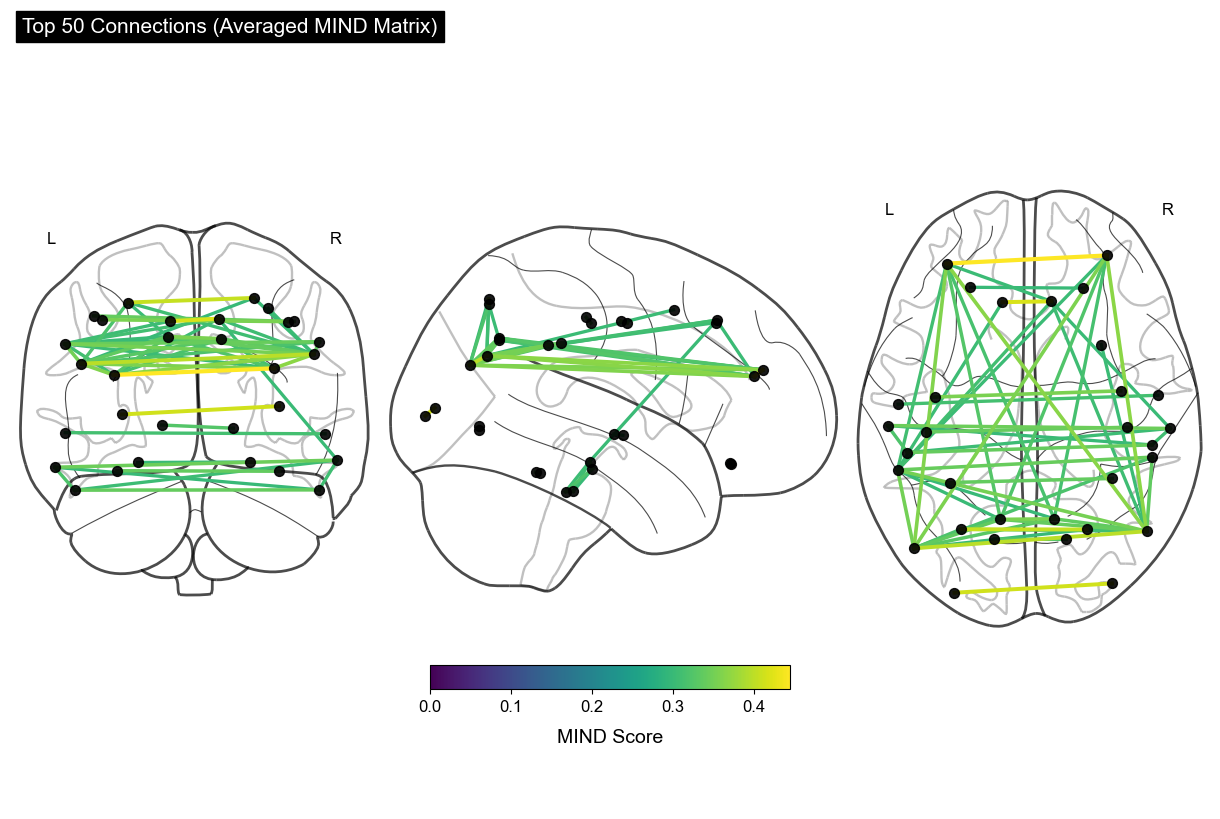


Top 10 edges:
1. lh_rostralmiddlefrontal-rh_rostralmiddlefrontal: 0.4448
2. lh_superiorfrontal-rh_superiorfrontal: 0.4175
3. lh_lateraloccipital-rh_lateraloccipital: 0.4122
4. lh_superiorparietal-rh_superiorparietal: 0.4055
5. lh_inferiorparietal-rh_inferiorparietal: 0.3993
6. rh_inferiorparietal-rh_rostralmiddlefrontal: 0.3667
7. lh_rostralmiddlefrontal-rh_inferiorparietal: 0.3652
8. lh_inferiorparietal-lh_rostralmiddlefrontal: 0.3599
9. lh_inferiorparietal-rh_rostralmiddlefrontal: 0.3571
10. lh_precuneus-rh_precuneus: 0.3554


In [43]:
plot_matrix_edges('/Users/baileyng/MIND_data/MIND_results/aparc_all.csv', 
                  'Averaged MIND Matrix', top_n=50)

Loaded matrix from: /Users/baileyng/MIND_data/MIND_results/aparc_all.csv
Shape: (68, 68)
Found 2278 non-zero edges from upper triangle
Top edge value magnitude: 0.4448
Top 100 edges being plotted


/var/folders/kb/ln31wlhj2hb0n089p20hvk9r0000gn/T/ipykernel_40648/2345389939.py:146: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.2, 1, 1])


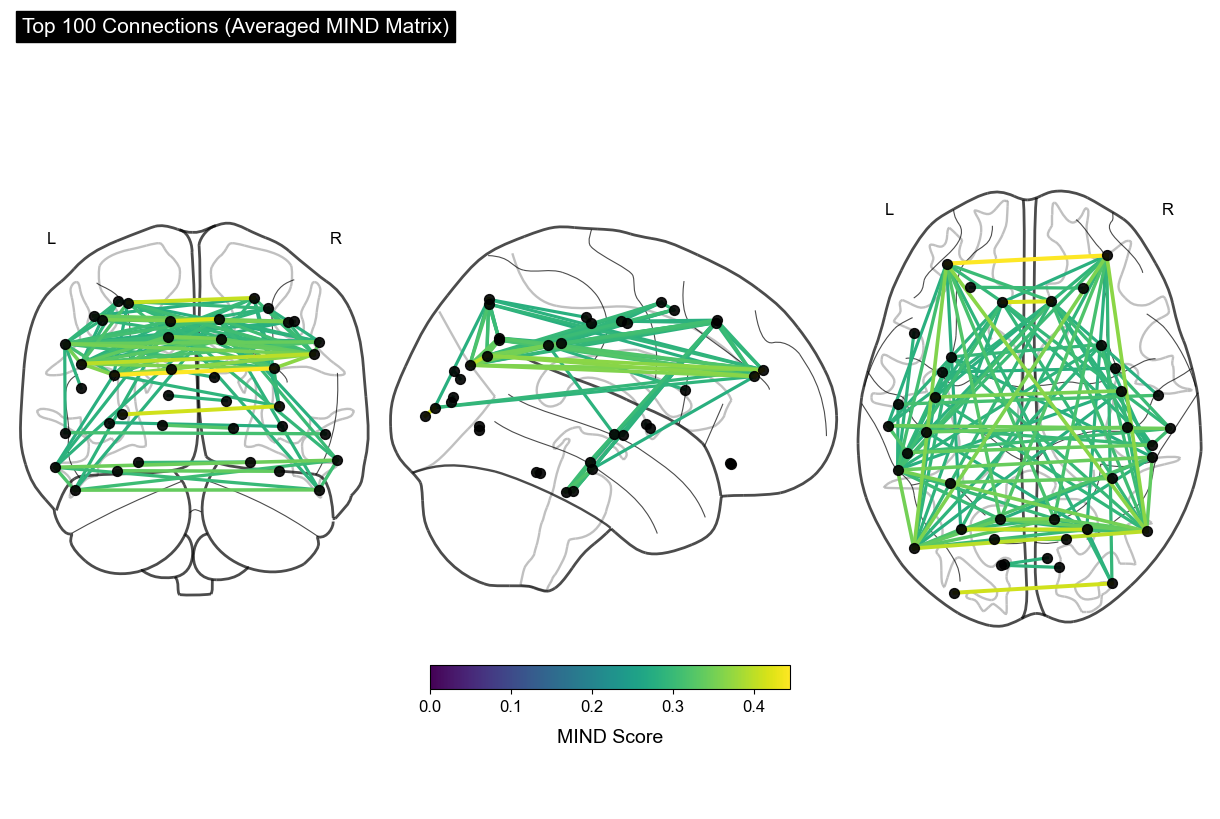


Top 10 edges:
1. lh_rostralmiddlefrontal-rh_rostralmiddlefrontal: 0.4448
2. lh_superiorfrontal-rh_superiorfrontal: 0.4175
3. lh_lateraloccipital-rh_lateraloccipital: 0.4122
4. lh_superiorparietal-rh_superiorparietal: 0.4055
5. lh_inferiorparietal-rh_inferiorparietal: 0.3993
6. rh_inferiorparietal-rh_rostralmiddlefrontal: 0.3667
7. lh_rostralmiddlefrontal-rh_inferiorparietal: 0.3652
8. lh_inferiorparietal-lh_rostralmiddlefrontal: 0.3599
9. lh_inferiorparietal-rh_rostralmiddlefrontal: 0.3571
10. lh_precuneus-rh_precuneus: 0.3554


In [44]:
plot_matrix_edges('/Users/baileyng/MIND_data/MIND_results/aparc_all.csv', 
                  'Averaged MIND Matrix', top_n=100)